In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import sklearn
import os

# 1

Simulate any random rectangular matrix A

In [38]:
np.random.seed(42)
rows = int(input('Enter the number of rows'))
columns = int(input('Enter the number of columns'))
print('rows:',rows)
print('columns:',columns)
A = np.random.rand(rows,columns) #matriz simulada
A

rows: 3
columns: 2


array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

What is the rank and trace of A? -> rank: number of columns linearly independent. trace: sum of elements of the main diagonal

In [73]:
print(np.linalg.matrix_rank(A), 'is the rank of the matrix')
print(A.trace(), 'is the rank of the matrix')

2 is the rank of the matrix
0.9731986030443991 is the rank of the matrix


What is the determinant of A?

In [39]:
try:
    determinant =  np.linalg.det(A)
    print(determinant, " is the determinant of the matrix.")
except: print("The determinant cannot be calculated. The element is not a square matrix.")


The determinant cannot be calculated. The element is not a square matrix.


Can you invert A? How?

In [111]:
try: 
    determinant =  np.linalg.det(A) 
    if determinant!=0:
        print('yes, it could be done by mehtods like Gauss-Jordan. Here we use numpy to make by default.\n inverse:\n',np.linalg.inv(A))
    else:
        print("not, it couldn't be done because determinant is zero")
except: 
    try:(print("yes, but it requires Moore-Penrose pseudo inverse due to matrix size (not square matrix)\n inverse:\n",np.linalg.pinv(A)))
    except:print("not, it couldn't be done")

yes, but it requires Moore-Penrose pseudo inverse due to matrix size (not square matrix)
 inverse:
 [[-1.28309309  1.95527326  0.31612669]
 [ 1.55535653 -0.77880102 -0.07989937]]


How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

$B=AA^{'}$

$C=A^{'}A$

In [64]:
B = np.matmul(A,np.matrix.transpose(A))
C = np.matmul(np.matrix.transpose(A),A)

eigenvalues:

In [70]:
np.linalg.eig(B)[0]

array([ 1.86302318e+00,  1.23998028e-01, -7.76811930e-18])

In [69]:
np.linalg.eig(C)[0]

array([0.12399803, 1.86302318])

The first n elements are the same in different positions.

eigenvectors:

In [71]:
np.linalg.eig(B)[1]

array([[ 0.72749286,  0.68475105, -0.0432451 ],
       [ 0.66737678, -0.72084713, -0.18704987],
       [ 0.1592557 , -0.10721667,  0.98139809]])

In [72]:
np.linalg.eig(C)[1]

array([[-0.81763524, -0.57573659],
       [ 0.57573659, -0.81763524]])

Vectors are different.

# 2

Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it?

## Face detection

In [20]:
# pip install opencv-utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for opencv-utils: filename=opencv_utils-0.0.2-py3-none-any.whl size=6110 sha256=eff480da65f24dcea0b2c4b127e16fafd6ebd47997d556d1e0e9f60e2f56aa5a
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\36\5e\68\49f3f5f556dfc62b81696518b14583a97051e3ee9e666fc71c
Successfully built opencv-utils
Note: you may need to restart the kernel to use updated packages.


In [21]:
# pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [188]:
#remove accents in file names

#https://gist.github.com/kost/bda3c37e684923a07b60
import unicodedata
def remove_accents(s):
    nkfd_form = unicodedata.normalize('NFKD', s)
    return u''.join([c for c in nkfd_form if not unicodedata.combining(c)])

import os
#https://stackoverflow.com/questions/37467561/renaming-multiple-files-in-a-directory-using-python
#eliminamos los acentos
path = 'D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/faces_orig/'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, remove_accents(file)))

files = os.listdir(path)

In [7]:
# #### Get list of pictures
# import os

# # specify the img directory path
# path = "D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/faces_orig/"

# # list files in img directory
# files = os.listdir(path)

# for file in files:
#     # make sure file is an image
#     if file.endswith(('.jpg', '.png', 'jpeg')):
#         img_path = path + file

In [189]:
import cv2
for file in files:
    print(file)
    image = cv2.imread(path+file)#import image
    height = image.shape[0]
    width = image.shape[1]
    if height>2000 | width>2000:#resize. if it's too big, cv2 won't recognize face
        new_height = height/(max(height,width)/1000)
        new_width = width/(max(height,width)/1000)
        new_dim = (int(new_width),int(new_height))
        image = cv2.resize(image, new_dim, interpolation = cv2.INTER_AREA)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30),
            maxSize=(3000,3000)
    ) 

    print("Found {0} Faces!".format(len(faces)))
    for (x, y, w, h) in faces:
        cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_bn = gray[y:y + h, x:x + w]
        final_dim = (int(256),int(256))
        roi_bn = cv2.resize(roi_bn,final_dim,interpolation = cv2.INTER_AREA)
        # roi_color = cv2.resize(roi_color,dim=(256,256),interpolation = cv2.INTER_AREA)
        # print("[INFO] Object found. Saving locally.")
        cv2.imwrite('D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/extracted_faces/' + file,roi_bn)

AE256.jpg
Found 1 Faces!
Alvaro Gomez.jpg
Found 1 Faces!
Ana Estefania Henao.jpg
Found 1 Faces!
Andres Felipe Orrego.jpg
Found 1 Faces!
Daniel Acosta.jpg
Found 1 Faces!
Diego.jpg
Found 1 Faces!
edward_giraldo.jpg
Found 1 Faces!
Federico Ocampo.jpg
Found 1 Faces!
Fernando_Franco.jpg
Found 1 Faces!
Foto1.jpg
Found 1 Faces!
Foto2.jpeg
Found 1 Faces!
fotoesp.jpg
Found 1 Faces!
Foto_MAH.jpg
Found 1 Faces!
JenniferD.jpg
Found 1 Faces!
jessica.jpeg
Found 1 Faces!
johan_vargas.jpg
Found 1 Faces!
Juan Jose Gil Hoyos.jpg
Found 1 Faces!
maria_ipia.jpg
Found 1 Faces!
Mauricio.jpg
Found 1 Faces!
OsvalAgudelo256256.jpg
Found 1 Faces!
Sebastian Giraldo Zuluaga.jpg
Found 1 Faces!
SEBASTIAN HOLGUIN OSORIO.jpg
Found 1 Faces!
sebastian_torres.jpg
Found 1 Faces!
shir.jpg
Found 1 Faces!
Vanessa_256x256_grises.jpeg
Found 1 Faces!
Viviana_256x256_grises.jpeg
Found 1 Faces!
WhatsApp Image 2023-09-02 at 11.35.34 AM.jpeg
Found 1 Faces!


## Face average

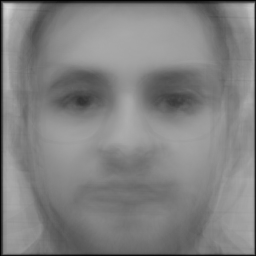

In [102]:
from PIL import Image
import numpy as np

path_processed = 'D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/extracted_faces/'
files_processed = os.listdir(path_processed)

w,h=Image.open(path_processed+files_processed[0]).size
N=len(files_processed)

# Average
average = np.zeros((h,w))

for im in files_processed:
    im_array=np.array(Image.open(path_processed+im))
    average = average + im_array
average = np.round(average/N,0).astype(int)*255#requires 255 due to jpg to see inside editor

# Generate, save and preview final image
out=Image.fromarray(average)
out.save("D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/2_average_face.png")
out

## Distance

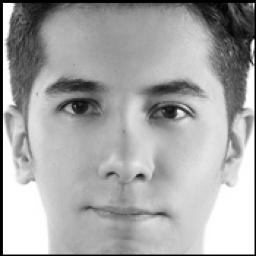

In [103]:
path_processed = 'D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/extracted_faces/'
yo = Image.open(path_processed+"Daniel Acosta.jpg")
yo

In [217]:
np.round(np.linalg.norm(yo - average, axis=1))

array([  66.,  670.,  913.,  700.,  861.,  914.,  891.,  906.,  881.,
        838.,  840.,  848.,  842.,  824.,  813.,  824.,  798.,  769.,
        783.,  805.,  785.,  767.,  771.,  775.,  779.,  782.,  777.,
        764.,  752.,  763.,  764.,  776.,  791.,  788.,  781.,  783.,
        775.,  762.,  701.,  661.,  647.,  645.,  653.,  660.,  649.,
        641.,  637.,  655.,  646.,  641.,  633.,  609.,  599.,  598.,
        591.,  585.,  586.,  591.,  599.,  602.,  616.,  613.,  627.,
        627.,  646.,  675.,  712.,  742.,  786.,  842.,  902.,  952.,
        999., 1042., 1064., 1080., 1093., 1090., 1084., 1027.,  974.,
        944.,  910.,  871.,  851.,  840.,  823.,  815.,  808.,  777.,
        745.,  724.,  737.,  783.,  870.,  930.,  975., 1026., 1059.,
       1046., 1043., 1036., 1009.,  989.,  963.,  922.,  929.,  943.,
        892.,  864.,  872.,  842.,  822.,  816.,  783.,  759.,  763.,
        741.,  716.,  716.,  729.,  734.,  738.,  741.,  733.,  729.,
        728.,  727.,

In [225]:
dist = (average - yo)**2
dist = np.sum(dist, axis=1)
dist = np.sqrt(dist)
dist

array([  66.43794097,  670.27606253,  913.38765045,  699.97428524,
        860.76071007,  913.64161464,  891.35346524,  906.04249348,
        881.08172152,  838.03460549,  840.06547364,  848.17627885,
        842.49866469,  824.08858747,  813.22075724,  824.0552166 ,
        798.37146743,  768.80166493,  783.03384346,  805.28318001,
        785.29230227,  767.31023713,  771.06549657,  774.66121627,
        778.97111628,  782.33304928,  776.56422787,  764.25192182,
        752.44335335,  762.87023798,  764.30229622,  775.86016781,
        790.71676345,  788.44530565,  781.05953678,  782.71642374,
        774.81029936,  761.69153862,  700.66539803,  661.45899344,
        647.16303974,  645.21004332,  652.54961497,  659.52786143,
        649.49518859,  640.5325909 ,  636.80138191,  655.18623307,
        645.54163305,  640.97581858,  632.83410148,  609.12806535,
        598.55993852,  598.11620944,  591.49218084,  585.48014484,
        585.86346532,  591.46005782,  598.61840934,  602.19764

In [84]:
path_processed = 'D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/extracted_faces/'
yo_array = np.array(Image.open(path_processed+"Daniel Acosta.jpg"))
Image.fromarray(np.round(np.linalg.norm(average - yo, axis=1)).astype(int))#.show()
# Image.fromarray((average-yo)).show()


In [16]:
# new_image = img.resize((int(nuevo_ancho), int(nuevo_alto)))
# new_image.save('D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/nueva.jpg')

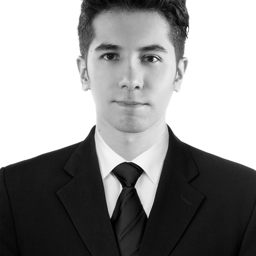

In [17]:
# from PIL import ImageOps
# # Setting the points for cropped image
# left = int((nuevo_ancho-nuevo_px)/2)
# top = int((nuevo_alto-nuevo_px)/2)
# right = int((nuevo_ancho-nuevo_px)/2)+nuevo_px
# bottom = int((nuevo_alto-nuevo_px)/2)+nuevo_px
 
# # Cropped image of above dimension
# # (It will not change original image)
# im1 = ImageOps.grayscale(new_image.copy().crop((left,top,right,bottom)))
# im1

In [ ]:
# from PIL import ImageOps
# # Setting the points for cropped image
# left = int((nuevo_ancho-nuevo_px)/2)
# top = int((nuevo_alto-nuevo_px)/2)
# right = int((nuevo_ancho-nuevo_px)/2)+nuevo_px
# bottom = int((nuevo_alto-nuevo_px)/2)+nuevo_px
 
# # Cropped image of above dimension
# # (It will not change original image)
# im1 = ImageOps.grayscale(new_image.copy().crop((left,top,right,bottom)))
im1

# 3

## SVD

$X=U \Sigma V^{T}$

$eigenvectors(A^{T}A) \Rightarrow cols(V)$

In [43]:
import numpy as np

In [6]:
A = np.array([[2,4],[1,3],[0,0],[0,0]])
A

array([[2, 4],
       [1, 3],
       [0, 0],
       [0, 0]])

In [151]:
#https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm
def my_svd_u(mat_x):    
    u = np.linalg.eig(mat_x@mat_x.T)[1]
    return u

def my_svd_vt(mat_x):
    ordenar  = np.argsort(np.linalg.eig(mat_x.T@mat_x)[0])[::-1]
    v = np.linalg.eig(mat_x.T@mat_x)[1][:,ordenar]
    return v.T

def my_svd_sigma(mat_x):
    if np.size(mat_x@mat_x.T) > np.size(mat_x.T@mat_x):
        mat_aux = mat_x.T@mat_x
    elif np.size(mat_x@mat_x.T) <= np.size(mat_x.T@mat_x):
        mat_aux = mat_x@mat_x.T

    ordenar  = np.argsort(np.linalg.eig(mat_aux)[0])[::-1]
    sigma = np.sqrt(np.linalg.eig(mat_aux)[0])[ordenar]
    # S = np.zeros(mat_x.shape)
    # np.fill_diagonal(S,sigma)
    return sigma

def my_svd(mat_x):
    u = my_svd_u(mat_x)
    vt = my_svd_vt(mat_x)
    s = my_svd_sigma(mat_x)
    return u,s,vt

## PCA

In [26]:
def my_pca(mat_A,n_components=2):
    #define matrix
    # np.random.seed(23)
    # A = np.random.rand(4,3) #matriz simulada

    # Center in mean
    mat_A_center = mat_A - np.mean(mat_A,axis=0)

    # Calculating the covariance matrix of the centered data.
    cov_mat = np.cov(mat_A_center , rowvar = False) #rowvar=False to set columns as variables

    # Eigenvalores and eigenvectores from covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #sort the eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_index]

    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # select dimension n (components)
    
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    A_PCA = np.dot(eigenvector_subset.transpose() , mat_A_center.transpose() ).transpose()
    return(A_PCA)

In [238]:
np.random.seed(23)
A = np.random.rand(20,5) #matriz simulada
my_pca(A,5)

array([[ 4.02520545e-01, -2.83381081e-02, -4.66501590e-01,
         3.51477715e-02,  4.31017035e-02],
       [-2.43629663e-01,  2.18963061e-01,  1.56757193e-01,
        -1.60269615e-01, -9.68863898e-02],
       [ 7.37634368e-01, -2.84512627e-01,  6.82853809e-04,
         1.56603733e-02,  1.94318495e-01],
       [-4.00308623e-01, -1.19014835e-01, -5.16770122e-01,
         2.62261531e-01, -6.32822182e-02],
       [-4.29293257e-01, -6.72673640e-01, -1.50990503e-01,
        -8.28786203e-02,  1.05816723e-01],
       [ 1.45908422e-01,  2.11488898e-01,  4.28666371e-01,
         2.71539993e-01,  2.57469286e-02],
       [-2.97685823e-01,  1.99744871e-01, -3.19824111e-01,
         3.37632093e-01, -9.36929463e-02],
       [ 4.25879161e-01, -4.42380323e-01, -2.85315414e-03,
         1.97223878e-01, -3.17168308e-02],
       [ 2.16798308e-01,  2.20258430e-01, -3.04336502e-01,
         8.08063178e-02,  5.23545028e-02],
       [ 6.69436172e-02, -3.50683517e-01,  3.84135397e-01,
         9.44374163e-03

## t-SNE

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# all the formulas are from https://cs.nyu.edu/~roweis/papers/sne_final.pdf
# and http://www.cs.toronto.edu/~hinton/absps/tsne.pdf
# https://github.com/beaupletga/t-SNE/blob/master/main.py
PERPLEXITY = 5 #vecinos
g_kernel = 1
EPOCHS = 2000
LR = 200
MOMENTUM = 0.99

def getKey(item):
    return item[1]

#compute the distance between the neighboors of x1 and return a list of the k neghboors
#where k is the complexity
def k_neighbours(x,x1_index,p_or_q='p'):
    x1=x[x1_index]
    list_k_neighbours=[]
    for i in range(x.shape[0]):
        if i!=x1_index:
            xi=x[i]
            if p_or_q=='p':
                distance=np.exp(-np.linalg.norm(x1-xi)**2/(2*g_kernel**2))
            else:
                distance=(1+np.linalg.norm(x1-xi)**2)**-1
            list_k_neighbours.append([i,distance])
    
    list_k_neighbours=sorted(list_k_neighbours,key=getKey)
    return list_k_neighbours[:PERPLEXITY]

#compute the similarity pij between two xi,xj in the original space
#divide the distance between xi,xj by the sum of the distances of the k_neightbours where k is the complexity
def compute_pij(x,x1_index,x2_index):
    x1=x[x1_index]
    x2=x[x2_index]
    # num=(1+np.linalg.norm(x1-x2)**2)**(-1)/(2*g_kernel**2))
    num=np.exp(-np.linalg.norm(x1-x2)**2)/(2*g_kernel**2)
    denom=0
    list_k_neighbours=k_neighbours(x,x1_index,'p')
    for i in list_k_neighbours:
        denom+=i[1]
    return num/denom


#compute the table p of the xij in the original space
def compute_p(x):
    table=np.zeros((x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if i!=j:
                pij=compute_pij(x,i,j)
                pji=compute_pij(x,j,i)
                table[i,j]=(pij+pji)/(2*x.shape[0])
                # table[i,j]=pij
    return table

#compute the similarity qij between two yi,yj in the new space
#divide the distance between yi,yj by the sum of the distances of the k_neightbours where k is the complexity
def compute_qij(y,y1_index,y2_index):
    y1=y[y1_index]
    y2=y[y2_index]
    num=(1+np.linalg.norm(y1-y2)**2)**(-1)
    denom=0
    for i in k_neighbours(y,y1_index,'q'):
        denom+=i[1]
    return num/denom

#compute the table q of the yij in the new space
def compute_q(y):
    table=np.zeros((y.shape[0],y.shape[0]))
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            if i!=j:
                qij=compute_qij(y,i,j)
                table[i,j]=qij
    return table

#compute the errors between the 2 distributions using the KL-divergence
def kl_divergence(p,q):
    total=0
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            if q[i,j]!=0 and p[i,j]!=0:
                total+=p[i,j]*np.log(p[i,j]/q[i,j])
    return total

#apply gradient descent to lower the KL-divergence
#added momentum increase the speed
def gradient_descent(p,q,y):
    history=np.zeros((p.shape[0],2,y.shape[1]))
    for iter in range(EPOCHS):
        for i in range(y.shape[0]):
            sum_value=0
            for j in range(y.shape[0]):
                sum_value+=((y[i]-y[j])*(p[i,j]-q[i,j])*(1+np.linalg.norm(y[i]-y[j]**2))**-1)
            y[i]-=4*LR*sum_value+MOMENTUM*(history[i,1]-history[i,0])
            history[i,0]=history[i,1]
            history[i,1]=y[i]
        if iter%100==0:
            q=compute_q(y)
            # print(kl_divergence(p,q)) 
    y-=np.mean(y)
    y/=np.std(y)
    return y




In [55]:
x=np.random.rand(10,3)
x=np.tile(x,(2,1))
x[:10]*=0.1
x

array([[4.40275359e-02, 1.55402674e-02, 5.11993342e-02],
       [2.77533581e-02, 5.72836039e-02, 6.72516826e-02],
       [3.19229136e-02, 6.16680237e-02, 4.20815640e-03],
       [8.24458439e-02, 4.80632589e-02, 4.85628573e-02],
       [6.08670878e-02, 7.18729750e-02, 7.40093015e-02],
       [2.09179109e-02, 5.90478247e-03, 1.97431941e-02],
       [9.11321131e-02, 7.03940680e-02, 7.50615991e-03],
       [8.57185615e-04, 6.81857617e-02, 7.66352861e-02],
       [8.37796698e-02, 6.42616265e-02, 4.19319548e-02],
       [6.13022353e-02, 8.06658182e-02, 2.30579223e-02],
       [4.40275359e-01, 1.55402674e-01, 5.11993342e-01],
       [2.77533581e-01, 5.72836039e-01, 6.72516826e-01],
       [3.19229136e-01, 6.16680237e-01, 4.20815640e-02],
       [8.24458439e-01, 4.80632589e-01, 4.85628573e-01],
       [6.08670878e-01, 7.18729750e-01, 7.40093015e-01],
       [2.09179109e-01, 5.90478247e-02, 1.97431941e-01],
       [9.11321131e-01, 7.03940680e-01, 7.50615991e-02],
       [8.57185615e-03, 6.81857

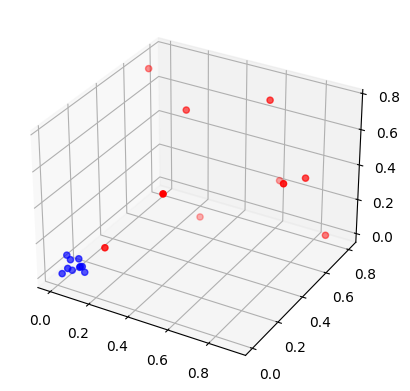

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color=['blue']*10+['red']*10
ax.scatter(x[:,0],x[:,1],x[:,2],color=color)
plt.show()

In [96]:
x

array([[4.40275359e-02, 1.55402674e-02, 5.11993342e-02],
       [2.77533581e-02, 5.72836039e-02, 6.72516826e-02],
       [3.19229136e-02, 6.16680237e-02, 4.20815640e-03],
       [8.24458439e-02, 4.80632589e-02, 4.85628573e-02],
       [6.08670878e-02, 7.18729750e-02, 7.40093015e-02],
       [2.09179109e-02, 5.90478247e-03, 1.97431941e-02],
       [9.11321131e-02, 7.03940680e-02, 7.50615991e-03],
       [8.57185615e-04, 6.81857617e-02, 7.66352861e-02],
       [8.37796698e-02, 6.42616265e-02, 4.19319548e-02],
       [6.13022353e-02, 8.06658182e-02, 2.30579223e-02],
       [4.40275359e-01, 1.55402674e-01, 5.11993342e-01],
       [2.77533581e-01, 5.72836039e-01, 6.72516826e-01],
       [3.19229136e-01, 6.16680237e-01, 4.20815640e-02],
       [8.24458439e-01, 4.80632589e-01, 4.85628573e-01],
       [6.08670878e-01, 7.18729750e-01, 7.40093015e-01],
       [2.09179109e-01, 5.90478247e-02, 1.97431941e-01],
       [9.11321131e-01, 7.03940680e-01, 7.50615991e-02],
       [8.57185615e-03, 6.81857

In [100]:
def my_TSNE(x):
    table_p=compute_p(x)
    y=x.dot(np.random.rand(x.shape[1],2))
    y-=np.mean(y)
    y/=np.std(y)
    table_q=compute_q(y)
    y=gradient_descent(table_p,table_q,y)
    return(y)

In [105]:
x

array([[4.40275359e-02, 1.55402674e-02, 5.11993342e-02],
       [2.77533581e-02, 5.72836039e-02, 6.72516826e-02],
       [3.19229136e-02, 6.16680237e-02, 4.20815640e-03],
       [8.24458439e-02, 4.80632589e-02, 4.85628573e-02],
       [6.08670878e-02, 7.18729750e-02, 7.40093015e-02],
       [2.09179109e-02, 5.90478247e-03, 1.97431941e-02],
       [9.11321131e-02, 7.03940680e-02, 7.50615991e-03],
       [8.57185615e-04, 6.81857617e-02, 7.66352861e-02],
       [8.37796698e-02, 6.42616265e-02, 4.19319548e-02],
       [6.13022353e-02, 8.06658182e-02, 2.30579223e-02],
       [4.40275359e-01, 1.55402674e-01, 5.11993342e-01],
       [2.77533581e-01, 5.72836039e-01, 6.72516826e-01],
       [3.19229136e-01, 6.16680237e-01, 4.20815640e-02],
       [8.24458439e-01, 4.80632589e-01, 4.85628573e-01],
       [6.08670878e-01, 7.18729750e-01, 7.40093015e-01],
       [2.09179109e-01, 5.90478247e-02, 1.97431941e-01],
       [9.11321131e-01, 7.03940680e-01, 7.50615991e-02],
       [8.57185615e-03, 6.81857

In [107]:
TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2).fit_transform(x).shape

(20, 2)

In [112]:
TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2).fit_transform(x)

array([[   2.2698326,  114.769264 ],
       [ -22.427456 ,   52.767296 ],
       [  50.144287 ,   85.704414 ],
       [  31.045624 ,   50.230667 ],
       [ -13.448751 ,   41.522217 ],
       [  11.758246 ,  117.89118  ],
       [  58.987755 ,   59.021145 ],
       [ -29.966488 ,   59.932182 ],
       [  39.595123 ,   56.0008   ],
       [  50.234066 ,   70.24101  ],
       [  -5.6126647,    8.723966 ],
       [   3.2780325, -108.319496 ],
       [  94.64152  ,  -89.7526   ],
       [  60.01549  , -111.66521  ],
       [  16.442772 , -110.279854 ],
       [  -6.4549446,   24.19125  ],
       [  88.23553  , -116.741394 ],
       [  -7.0153384, -107.43329  ],
       [  70.13726  , -110.16276  ],
       [  86.20178  , -102.599884 ]], dtype=float32)

<Axes: xlabel='x', ylabel='y'>

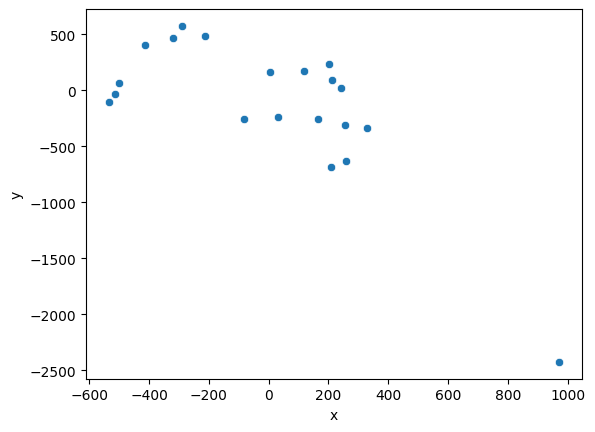

In [114]:
prueba_2df = pd.DataFrame(TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2).fit_transform(x),columns=['x','y'])
sns.scatterplot(prueba_2df,x='x',y='y')

<Axes: xlabel='x', ylabel='y'>

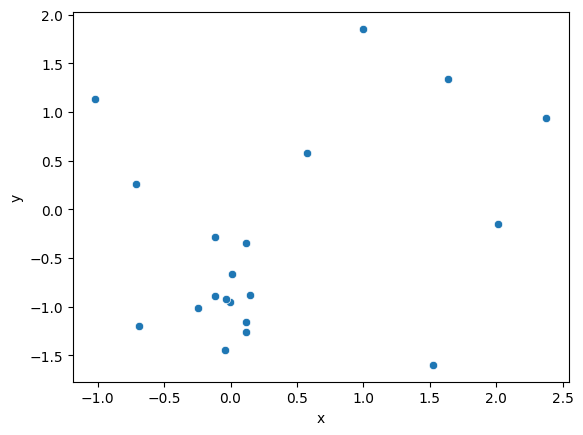

In [113]:
prueba_df = pd.DataFrame(prueba,columns=['x','y'])
sns.scatterplot(prueba_df,x='x',y='y')

In [111]:
prueba

array([[-0.04002876, -1.44940399],
       [-0.68814738, -1.19843934],
       [-0.24534295, -1.01010738],
       [ 0.11971087, -1.25980476],
       [-0.11923741, -0.88831989],
       [-0.00628855, -0.95430298],
       [ 0.11351349, -1.15295654],
       [ 0.11981504, -0.34403148],
       [-0.03664748, -0.91637437],
       [ 0.01492723, -0.66681287],
       [ 1.52633878, -1.59865437],
       [-1.01621532,  1.13820682],
       [-0.11304628, -0.28586451],
       [ 2.37657041,  0.94180598],
       [ 0.99849223,  1.85299352],
       [ 0.14879441, -0.88357419],
       [ 2.01020784, -0.1540257 ],
       [-0.71206642,  0.25898199],
       [ 1.63429409,  1.33574589],
       [ 0.57462491,  0.57466944]])

In [110]:
prueba = my_TSNE(x)

-11.465364010682574
-15.439661073518478
-11.740671744721343
-11.042550290385611
-11.090940949426104
-11.138061598587512
-11.18348391912193
-11.226912385516503
-11.267429283804091
-11.308173113047461
-11.34671478749111
-11.383386839186786
-11.418493751182204
-11.452287451448841
-11.484792966917912
-11.516132637032255
-11.546407086881926
-11.575700416845448
-11.604083909956376
-11.631618740365097


In [97]:
x.dot(np.random.rand(x.shape[1],2))

array([[0.02019502, 0.06362586],
       [0.02303048, 0.11216052],
       [0.00832638, 0.05744193],
       [0.02683858, 0.09090223],
       [0.03050325, 0.13288775],
       [0.0084139 , 0.02473588],
       [0.01890813, 0.07188572],
       [0.02143141, 0.12809236],
       [0.02599385, 0.09830255],
       [0.01833702, 0.09282806],
       [0.20195019, 0.63625863],
       [0.2303048 , 1.12160522],
       [0.08326376, 0.57441933],
       [0.26838577, 0.90902227],
       [0.30503248, 1.32887749],
       [0.08413896, 0.24735879],
       [0.18908131, 0.71885718],
       [0.21431413, 1.28092356],
       [0.25993854, 0.98302552],
       [0.18337023, 0.92828058]])

In [95]:
compute_p(x)

array([[0.        , 0.0086921 , 0.00875408, 0.0085912 , 0.0085312 ,
        0.008937  , 0.00855829, 0.00871075, 0.00854816, 0.00858735,
        0.00519095, 0.00380701, 0.00493152, 0.00311205, 0.00252453,
        0.00775142, 0.00265769, 0.00330015, 0.00278491, 0.00316701],
       [0.0086921 , 0.        , 0.00867169, 0.00849704, 0.00846686,
        0.00882088, 0.00846678, 0.00866196, 0.00846343, 0.00851547,
        0.00519044, 0.00398536, 0.00506766, 0.00315887, 0.00265567,
        0.00767411, 0.00270627, 0.00352994, 0.00285893, 0.00329855],
       [0.00875408, 0.00867169, 0.        , 0.00856739, 0.00851031,
        0.00891519, 0.00858343, 0.00869707, 0.00854224, 0.00861438,
        0.00496171, 0.00373996, 0.00515583, 0.0030446 , 0.00247801,
        0.00760663, 0.00275293, 0.00326739, 0.00278202, 0.0032872 ],
       [0.0085912 , 0.00849704, 0.00856739, 0.        , 0.00836552,
        0.00870998, 0.00841494, 0.00850425, 0.00839456, 0.00842941,
        0.00524332, 0.00390378, 0.00509772, 0

In [61]:
np.random.rand(x.shape[1],2)

array([[0.69080467, 0.39583084],
       [0.81696178, 0.17230519],
       [0.60867509, 0.80717961]])

In [60]:
x.dot(np.random.rand(x.shape[1],2))

array([[0.09178481, 0.08358166],
       [0.1114421 , 0.11497692],
       [0.06027591, 0.05673204],
       [0.13802376, 0.12015789],
       [0.1531963 , 0.14778587],
       [0.03879017, 0.03428079],
       [0.11895362, 0.09662306],
       [0.10150067, 0.11628819],
       [0.14073008, 0.12356977],
       [0.11172133, 0.10217022],
       [0.91784807, 0.83581659],
       [1.114421  , 1.14976923],
       [0.60275915, 0.56732042],
       [1.38023755, 1.20157889],
       [1.53196305, 1.47785869],
       [0.38790172, 0.34280787],
       [1.18953617, 0.96623064],
       [1.01500672, 1.16288188],
       [1.40730078, 1.23569765],
       [1.11721335, 1.02170222]])

In [ ]:
y=x.dot(np.random.rand(x.shape[1],2))
y-=np.mean(y)
y/=np.std(y)
table_q=compute_q(y)
y=gradient_descent(table_p,table_q,y)

In [ ]:
def main():
    #I choose a dataset with two well separated part
    x=np.random.rand(10,3)
    x=np.tile(x,(2,1))
    x[:10]*=0.1
    color=['blue']*10+['red']*10

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0],x[:,1],x[:,2],color=color)
    plt.show()

    table_p=compute_p(x)

    #Probably not the right way to initialize the new space y
    y=x.dot(np.random.rand(x.shape[1],2))
    y-=np.mean(y)
    y/=np.std(y)
    table_q=compute_q(y)
    y=gradient_descent(table_p,table_q,y)

    plt.scatter(y[:,0],y[:,1],color=color)
    plt.show()

main()

In [ ]:
# Set global parameters
NUM_POINTS = 200            # Number of samples from MNIST
CLASSES_TO_USE = [0, 1, 8]  # MNIST classes to use
PERPLEXITY = 20
SEED = 1                    # Random seed
MOMENTUM = 0.9
LEARNING_RATE = 10.
NUM_ITERS = 500             # Num iterations to train for
TSNE = False                # If False, Symmetric SNE
NUM_PLOTS = 5               # Num. times to plot in training


def main():
    # numpy RandomState for reproducibility
    rng = np.random.RandomState(SEED)

    # Load the first NUM_POINTS 0's, 1's and 8's from MNIST
    X, y = load_mnist('datasets/',
                      digits_to_keep=CLASSES_TO_USE,
                      N=NUM_POINTS)

    # Obtain matrix of joint probabilities p_ij
    P = p_joint(X, PERPLEXITY)

    # Fit SNE or t-SNE
    Y = estimate_sne(X, y, P, rng,
             num_iters=NUM_ITERS,
             q_fn=q_tsne if TSNE else q_joint,
             grad_fn=tsne_grad if TSNE else symmetric_sne_grad,
             learning_rate=LEARNING_RATE,
             momentum=MOMENTUM,
             plot=NUM_PLOTS)

In [ ]:
Y = estimate_sne(X, y, P, rng,
             num_iters=NUM_ITERS,
             q_fn=q_tsne if TSNE else q_joint,
             grad_fn=tsne_grad if TSNE else symmetric_sne_grad,
             learning_rate=LEARNING_RATE,
             momentum=MOMENTUM,
             plot=NUM_PLOTS)

# 4

In [180]:
path_processed = 'D:/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/2/Machine learning 2/Taller1/extracted_faces/'
yo_array = np.array(Image.open(path_processed+"Daniel Acosta.jpg"))
yo_array

array([[  1,   0,   2, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   1,   3],
       [  1,   0,   6, ...,  18,   7,   0],
       ...,
       [  0,   2,  21, ..., 251, 140,   1],
       [  0,   0,  11, ..., 138,  75,   0],
       [  0,   1,   0, ...,   0,   0,   1]], dtype=uint8)

In [175]:
u_1,s_1,vt_1 = my_svd(yo_array)
s_1 = np.diag(s_1)

C:\Users\danie\AppData\Local\Temp\ipykernel_23076\963832378.py:18: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.linalg.eig(mat_aux)[0])[ordenar]


In [187]:
u_2,s_2,vt_2 = np.linalg.svd(yo_array,full_matrices=False)
s_2 = np.diag(s_2)

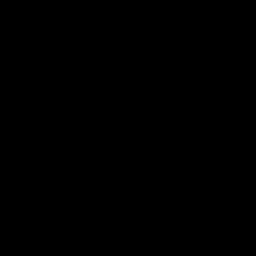

In [185]:
from PIL import Image
import numpy as np
k = 256
a = Image.fromarray((u_1[:,:k]@s_1[:k,:k]@vt_1[:k,:]).astype(int)*255)
a

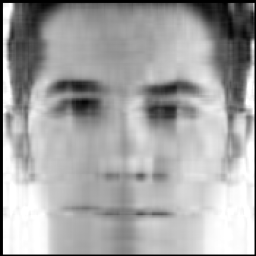

In [192]:
from PIL import Image
import numpy as np
dimen = 10
a = Image.fromarray((u_2[:,:dimen]@s_2[:dimen,:dimen]@vt_2[:dimen,:]).astype(int)*255)
a

# 5

Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling
this our baseline. What can you tell about the baseline performance?

In [194]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [195]:
mnist = load_digits(return_X_y=False)

y = pd.DataFrame(mnist.target)
X = pd.DataFrame(mnist.data)

y_sub = y[y[0].isin([0,8])]
X_sub = X.iloc[y_sub.index]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

In [23]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train.values.reshape(-1))
y_pred = LR_Model.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

Performance is too good. Elements in columns allow to define most of 0 and 8 cases.

# 6

Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per
image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

## PCA

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='x', ylabel='y'>

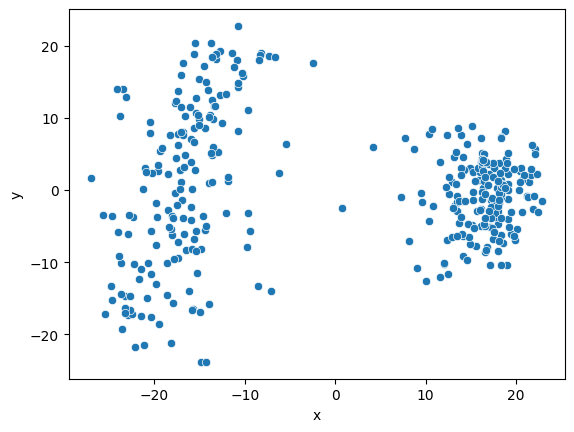

In [66]:
x_my_pca = pd.DataFrame(my_pca(X_sub,2),columns=['x','y'])
sns.scatterplot(x_my_pca,x='x',y='y')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_my_pca, y_sub, test_size=0.2, random_state=42)
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train.values.reshape(-1))
y_pred = LR_Model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## t-SNE

In [193]:
import numpy as np

def getKey(item):
    return item[1]

#compute the distance between the neighboors of x1 and return a list of the k neghboors
#where k is the complexity
def k_neighbours(x,x1_index,p_or_q='p',perplexity=5,g_kernel=1):
    x1=x[x1_index]
    list_k_neighbours=[]
    for i in range(x.shape[0]):
        if i!=x1_index:
            xi=x[i]
            if p_or_q=='p':
                distance=np.exp(-np.linalg.norm(x1-xi)**2/(2*g_kernel**2))
            else:
                distance=(1+np.linalg.norm(x1-xi)**2)**-1
            list_k_neighbours.append([i,distance])
    
    list_k_neighbours=sorted(list_k_neighbours,key=getKey)
    return list_k_neighbours[:perplexity]

#compute the similarity pij between two xi,xj in the original space
#divide the distance between xi,xj by the sum of the distances of the k_neightbours where k is the complexity
def compute_pij(x,x1_index,x2_index,g_kernel=1,perplexity=5):
    x1=x[x1_index]
    x2=x[x2_index]
    # num=(1+np.linalg.norm(x1-x2)**2)**(-1)/(2*g_kernel**2))
    num=np.exp(-np.linalg.norm(x1-x2)**2)/(2*g_kernel**2)
    denom=0
    list_k_neighbours=k_neighbours(x,x1_index,'p',perplexity=perplexity,g_kernel=g_kernel)
    for i in list_k_neighbours:
        denom+=i[1]
    return num/denom

#compute the table p of the xij in the original space
def compute_p(x,g_kernel=1,perplexity=5):
    table=np.zeros((x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if i!=j:
                pij=compute_pij(x,i,j,g_kernel=1,perplexity=5)
                pji=compute_pij(x,j,i,g_kernel=1,perplexity=5)
                table[i,j]=(pij+pji)/(2*x.shape[0])
                # table[i,j]=pij
    return table

#compute the similarity qij between two yi,yj in the new space
#divide the distance between yi,yj by the sum of the distances of the k_neightbours where k is the complexity
def compute_qij(y,y1_index,y2_index,perplexity=5,g_kernel=1):
    y1=y[y1_index]
    y2=y[y2_index]
    num=(1+np.linalg.norm(y1-y2)**2)**(-1)
    denom=0
    for i in k_neighbours(y,y1_index,'q',perplexity,g_kernel):
        denom+=i[1]
    return num/denom

#compute the table q of the yij in the new space
def compute_q(y,perplexity=5,g_kernel=1):
    table=np.zeros((y.shape[0],y.shape[0]))
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            if i!=j:
                qij=compute_qij(y,i,j,perplexity=perplexity,g_kernel=g_kernel)
                table[i,j]=qij
    return table

#compute the erros between the 2 distributions using the KL-divergence
def kl_divergence(p,q):
    total=0
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            if q[i,j]!=0 and p[i,j]!=0:
                total+=p[i,j]*np.log(p[i,j]/q[i,j])
    return total

#apply gradient descent to lower the KL-divergence
#added momentum increase the speed
def gradient_descent(p,q,y,momentum=0.99,epochs=2000,lr=200,perplexity=5):
    history=np.zeros((p.shape[0],2,y.shape[1]))
    for iter in range(epochs):
        for i in range(y.shape[0]):
            sum_value=0
            for j in range(y.shape[0]):
                sum_value+=((y[i]-y[j])*(p[i,j]-q[i,j])*(1+np.linalg.norm(y[i]-y[j]**2))**-1)
            y[i]-=4*lr*sum_value+momentum*(history[i,1]-history[i,0])
            history[i,0]=history[i,1]
            history[i,1]=y[i]
        if iter%100==0:
            q=compute_q(y)
            print(kl_divergence(p,q)) 
    y-=np.mean(y)
    y/=np.std(y)
    return y

def my_tsne(X,tsne_seed=42,momentum=0.99,epochs=2000,lr=200,perplexity=5,g_kernel=1):
    np.random.seed(tsne_seed)
    table_p = compute_p(X)
    #Probably not the right way to initialize the new space y
    y=X.dot(np.random.rand(X.shape[1],2))
    y-=np.mean(y)
    y/=np.std(y)
    table_q=compute_q(y,perplexity=perplexity,g_kernel=g_kernel)
    y=gradient_descent(table_p,table_q,y,momentum,epochs,lr,perplexity)
    return(y)

In [199]:
X_sub

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [197]:
x_my_tsne = pd.DataFrame(my_tsne(X_sub,2),columns=['x','y'])
sns.scatterplot(x_my_tsne,x='x',y='y')

KeyError: 64

# 7

## PCA

<Axes: xlabel='x', ylabel='y'>

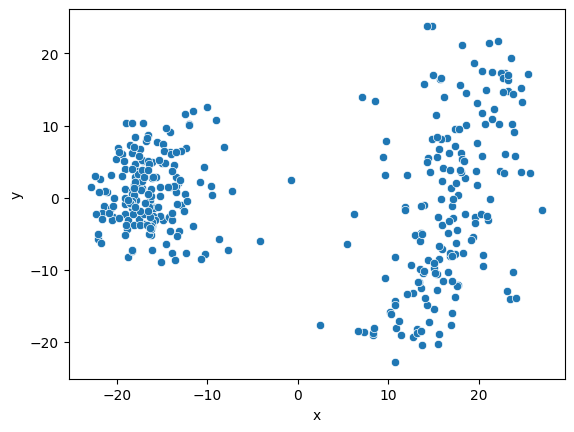

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_skl_pca = pd.DataFrame(pca.fit_transform(X_sub),columns=['x','y'])
sns.scatterplot(x_skl_pca,x='x',y='y')

## t-SNE

<Axes: xlabel='x', ylabel='y'>

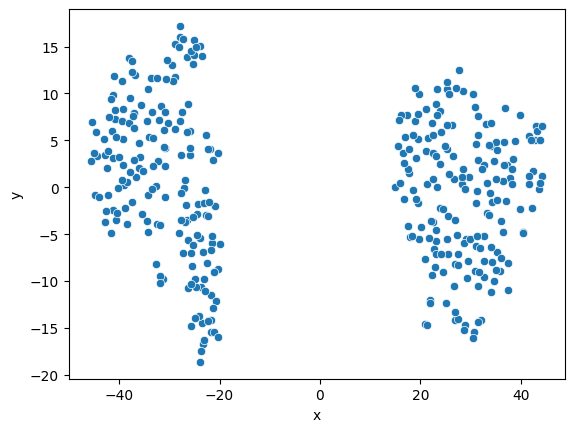

In [75]:
from sklearn.manifold import TSNE

x_skl_tsne =  pd.DataFrame(TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X_sub),columns=['x','y'])
sns.scatterplot(x_skl_tsne,x='x',y='y')

# 8

What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for
implementing them)

Regularization of data could be an useful strategy. PCA could be affected by outliers, noise or non-normality in the data. By regularization, which is a technique that penalizes overly complex or extreme solutions and encourages simpler or more sparse ones, can avoid overfitting, and reduce noise. 

# 9

What are the underlying mathematical principles behind UMAP? What is it useful for?

https://pair-code.github.io/understanding-umap/

https://www.youtube.com/watch?v=iqWy9Sb9P4Y

https://adelejackson.com/files/Maths_of_UMAP.pdf

https://arxiv.org/pdf/1802.03426.pdf

Uniform Manifold Approximation and Projection.

It uses concepts of topology. 

It uses elements called simplexes, which are geometrical elements formed by points. Joining points from a set of ponits in certain space, can be formed a simplixial complex. Those simplixial complex keep the information.

It's useful for reduction of dimension, even if set of information is too big. 


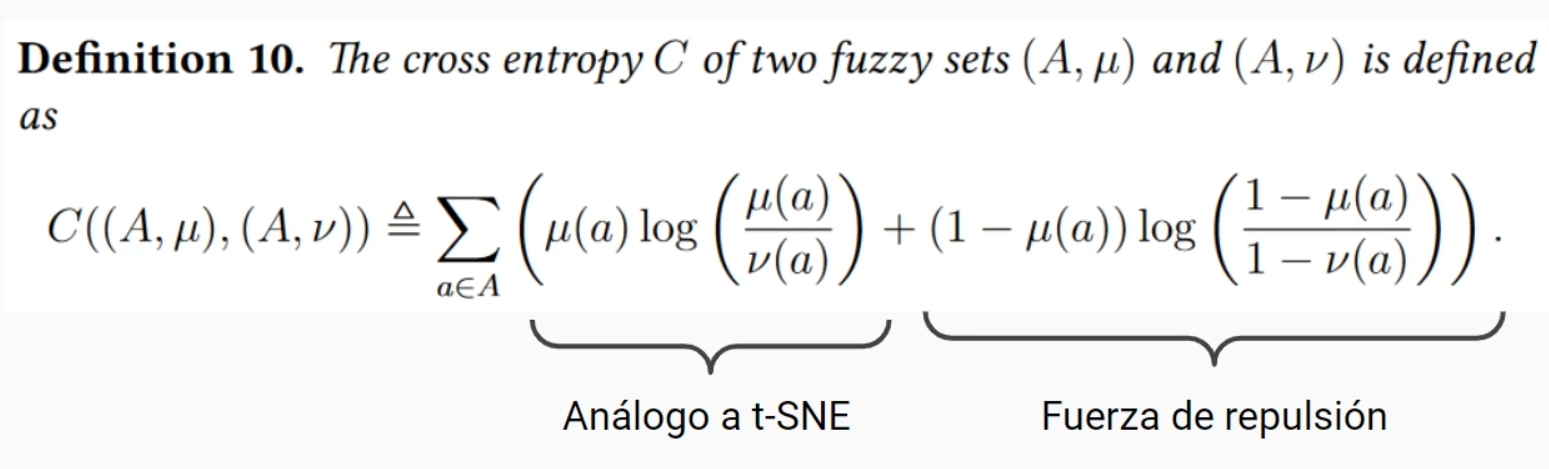

# 10

What are the underlying mathematical principles behind LDA? What is it useful for?

https://www.youtube.com/watch?v=O8RfKl2U79I

https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec11lda.pdf

linear discriminant analysis

Clasification method used to reduce dimensions. It's more useful by keeping information that allows to sepair elements instead of keep all information. It tries to maximize variance between classes over variance inside classes. 

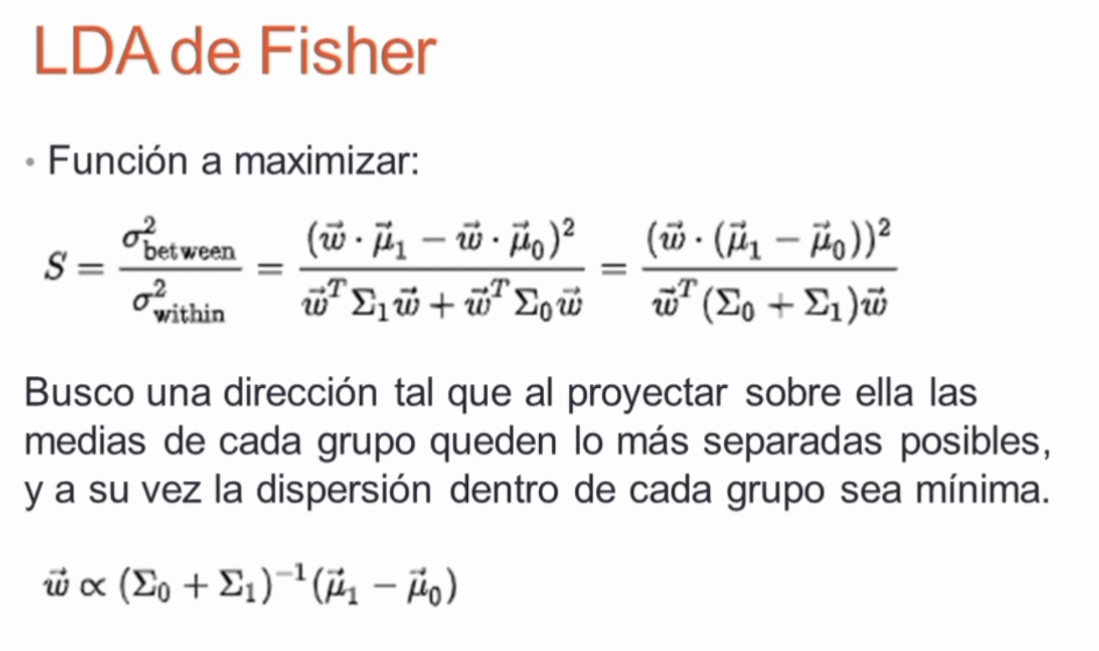

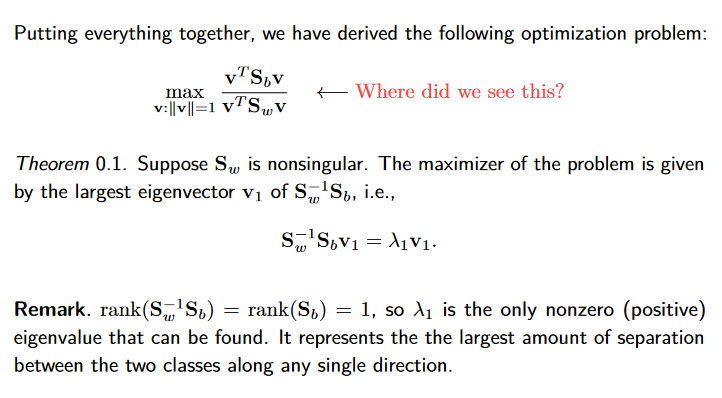

# 11